In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as smd
import scipy.stats as st
import sklearn
import matplotlib.pyplot as plt

In [2]:
#importing the dataset 
dataset=pd.read_csv("C:/Users/Admin/Documents/Features.csv")

In [3]:
# shows count of rows and columns
dataset.shape

(700, 9)

In [4]:
#shows first few rows of the code
dataset.head()

,INSUREDNAME,insured_username,Longhaul with team driver,VERIFICATION,DRUGTEST,Loss Ratio 2019,CUMULATIVE FREQUENCY,RATING,Risk status
0,2 Ports Logistics Inc,2440822.0,0,1,1,0.04,0.12,4.998890,0
1,24-7 On Time Cargo Company LLC,2199367.0,0,1,1,0.19,0.13,5.999547,0
2,4MDT TRANSPORTATION INC,2343318.0,0,1,1,0.10,0.19,4.998436,0
3,5 Star Express Inc,2185766.0,0,1,1,0.16,0.13,2.998887,0
4,88 Transportation and 88 Logistics,2198466.0,0,1,1,0.02,0.24,4.998342,0


In [5]:
#dropping INSUREDNAME column and insured_username column from the dataset
dataset=dataset.drop('INSUREDNAME',axis=1)
dataset=dataset.drop('insured_username',axis=1)
dataset.shape

(700, 7)

In [6]:
# explore missing values
dataset.isna().sum()

Longhaul with team driver     0
VERIFICATION                  0
DRUGTEST                      0
Loss Ratio 2019               0
CUMULATIVE FREQUENCY          8
RATING                        8
Risk status                   0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum()

Longhaul with team driver     0
VERIFICATION                  0
DRUGTEST                      0
Loss Ratio 2019               0
CUMULATIVE FREQUENCY          0
RATING                        0
Risk status                   0
dtype: int64

In [9]:
dataset.describe()

,Longhaul with team driver,VERIFICATION,DRUGTEST,Loss Ratio 2019,CUMULATIVE FREQUENCY,RATING,Risk status
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.005780,0.998555,0.997110,0.141199,0.168902,4.612696,0.063584
std,0.075863,0.038014,0.053721,0.283350,0.214839,1.204049,0.244187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.997896,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,3.998519,0.000000
50%,0.000000,1.000000,1.000000,0.010000,0.140000,4.998071,0.000000
75%,0.000000,1.000000,1.000000,0.160000,0.240000,5.000000,0.000000
max,1.000000,1.000000,1.000000,2.400000,2.440000,6.001569,1.000000


In [10]:
# Check the corr values of final list of variables
cor = dataset.corr()
cor

,Longhaul with team driver,VERIFICATION,DRUGTEST,Loss Ratio 2019,CUMULATIVE FREQUENCY,RATING,Risk status
Longhaul with team driver,1.000000,0.002901,0.004105,-0.007055,0.007493,0.056129,-0.019869
VERIFICATION,0.002901,1.000000,0.706595,0.018971,-0.007283,-0.012190,0.009913
DRUGTEST,0.004105,0.706595,1.000000,0.007834,0.012264,0.027493,0.014029
Loss Ratio 2019,-0.007055,0.018971,0.007834,1.000000,0.043588,0.078464,0.823820
CUMULATIVE FREQUENCY,0.007493,-0.007283,0.012264,0.043588,1.000000,0.225416,-0.018529
RATING,0.056129,-0.012190,0.027493,0.078464,0.225416,1.000000,0.019626
Risk status,-0.019869,0.009913,0.014029,0.823820,-0.018529,0.019626,1.000000


In [11]:
dataset=dataset.drop(["VERIFICATION"],1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18064\3247848062.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset=dataset.drop(["VERIFICATION"],1)


In [12]:
dataset.describe()

,Longhaul with team driver,DRUGTEST,Loss Ratio 2019,CUMULATIVE FREQUENCY,RATING,Risk status
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.005780,0.997110,0.141199,0.168902,4.612696,0.063584
std,0.075863,0.053721,0.283350,0.214839,1.204049,0.244187
min,0.000000,0.000000,0.000000,0.000000,0.997896,0.000000
25%,0.000000,1.000000,0.000000,0.000000,3.998519,0.000000
50%,0.000000,1.000000,0.010000,0.140000,4.998071,0.000000
75%,0.000000,1.000000,0.160000,0.240000,5.000000,0.000000
max,1.000000,1.000000,2.400000,2.440000,6.001569,1.000000


In [13]:
# Putting feature variable to X
X = dataset.loc[:, dataset.columns != 'Risk status']

In [14]:
# Putting response variable to y
y = dataset.iloc[:, 5].values

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [16]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [17]:
X_res.shape,y_res.shape

((1296, 5), (1296,))

In [18]:
# splitting dataset into training and test (in ratio 80:20)
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [19]:
# Feature Scaling
scaler = StandardScaler()

X_res_test[['Loss Ratio 2019','CUMULATIVE FREQUENCY','RATING']] = scaler.fit_transform(X_res_test[['Loss Ratio 2019','CUMULATIVE FREQUENCY','RATING']])

X_res_test.head()

,Longhaul with team driver,DRUGTEST,Loss Ratio 2019,CUMULATIVE FREQUENCY,RATING
936,0,1,1.187783,-0.718387,0.343521
474,0,1,-1.071027,0.104952,0.342555
1028,0,1,0.197344,-0.260420,1.185013
240,0,1,-1.071027,-1.302178,0.343512
1255,0,1,0.293571,-0.651355,-0.498389


In [20]:
# Adding the constant
from statsmodels.tools import add_constant as add_constant
X_res_train_constant = add_constant(X_res_test)
X_res_train_constant.head()

,const,Longhaul with team driver,DRUGTEST,Loss Ratio 2019,CUMULATIVE FREQUENCY,RATING
936,1.0,0,1,1.187783,-0.718387,0.343521
474,1.0,0,1,-1.071027,0.104952,0.342555
1028,1.0,0,1,0.197344,-0.260420,1.185013
240,1.0,0,1,-1.071027,-1.302178,0.343512
1255,1.0,0,1,0.293571,-0.651355,-0.498389


In [21]:
# fitting the model
logreg = LogisticRegression()
logreg.fit(X_res_test, y_res_test)

LogisticRegression()

In [22]:
y_train_pred = logreg.predict(X_res_test)

In [23]:
#confusion_matrix
print(confusion_matrix(y_res_test,y_train_pred))

[[117   1]
 [  0 142]]


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_res_test,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       142

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [26]:
print(accuracy_score(y_res_test, y_train_pred))

0.9961538461538462


[[5.62935957e-04 9.99437064e-01]
 [9.84882470e-01 1.51175300e-02]
 [7.38847011e-02 9.26115299e-01]
 [9.76878539e-01 2.31214612e-02]
 [5.96542667e-02 9.40345733e-01]
 [9.21564410e-01 7.84355902e-02]
 [8.74510120e-02 9.12548988e-01]
 [5.18754494e-06 9.99994812e-01]
 [7.65088637e-03 9.92349114e-01]
 [9.90797498e-01 9.20250231e-03]
 [9.82286619e-04 9.99017713e-01]
 [8.70775728e-04 9.99129224e-01]
 [8.69780651e-02 9.13021935e-01]
 [4.56472146e-02 9.54352785e-01]
 [9.91374983e-01 8.62501721e-03]
 [3.57933471e-02 9.64206653e-01]
 [2.46368758e-02 9.75363124e-01]
 [1.26082112e-03 9.98739179e-01]
 [2.55225888e-02 9.74477411e-01]
 [9.80772651e-01 1.92273489e-02]
 [6.84036528e-02 9.31596347e-01]
 [9.93283182e-01 6.71681805e-03]
 [3.82981704e-03 9.96170183e-01]
 [1.87025403e-01 8.12974597e-01]
 [9.84023723e-01 1.59762773e-02]
 [9.78270864e-01 2.17291362e-02]
 [1.41918248e-01 8.58081752e-01]
 [9.88423117e-01 1.15768830e-02]
 [9.91508528e-01 8.49147212e-03]
 [8.08181087e-03 9.91918189e-01]
 [9.807752

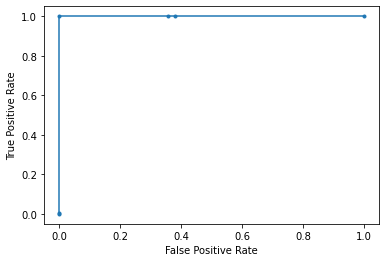

In [27]:
#Performance Metrics AUC, ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs=logreg.predict_proba(X_res_test)
print(lr_probs)


lr_probs = lr_probs[:, 1]


lr_auc = roc_auc_score(y_res_test, lr_probs)


print('Logistic: ROC AUC = %.3f' % (lr_auc))


lr_fpr, lr_tpr, _ = roc_curve(y_res_test, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
predictions = logreg.predict_proba(X_res_test)
predictions

array([[5.62935957e-04, 9.99437064e-01],
       [9.84882470e-01, 1.51175300e-02],
       [7.38847011e-02, 9.26115299e-01],
       [9.76878539e-01, 2.31214612e-02],
       [5.96542667e-02, 9.40345733e-01],
       [9.21564410e-01, 7.84355902e-02],
       [8.74510120e-02, 9.12548988e-01],
       [5.18754494e-06, 9.99994812e-01],
       [7.65088637e-03, 9.92349114e-01],
       [9.90797498e-01, 9.20250231e-03],
       [9.82286619e-04, 9.99017713e-01],
       [8.70775728e-04, 9.99129224e-01],
       [8.69780651e-02, 9.13021935e-01],
       [4.56472146e-02, 9.54352785e-01],
       [9.91374983e-01, 8.62501721e-03],
       [3.57933471e-02, 9.64206653e-01],
       [2.46368758e-02, 9.75363124e-01],
       [1.26082112e-03, 9.98739179e-01],
       [2.55225888e-02, 9.74477411e-01],
       [9.80772651e-01, 1.92273489e-02],
       [6.84036528e-02, 9.31596347e-01],
       [9.93283182e-01, 6.71681805e-03],
       [3.82981704e-03, 9.96170183e-01],
       [1.87025403e-01, 8.12974597e-01],
       [9.840237

In [29]:
# writing model output 

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(logreg.predict(X_res_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_res_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)


dfx.head(20)

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.000563,0.999437,1
1,0,0.984882,0.015118,0
2,1,0.073885,0.926115,1
3,0,0.976879,0.023121,0
4,1,0.059654,0.940346,1
5,0,0.921564,0.078436,0
6,1,0.087451,0.912549,1
7,1,0.000005,0.999995,1
8,1,0.007651,0.992349,1
9,0,0.990797,0.009203,0
